<a href="https://colab.research.google.com/github/hydiexe/machile-learning/blob/main/ML_PCAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd

In [74]:
df = pd.read_csv('https://raw.githubusercontent.com/febbisena/DataMining/main/Blood_samples_dataset.csv')
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [76]:
df.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [77]:
df.shape

(2351, 25)

In [78]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

print('data training: ', x_train.shape)
print('data testing: ', x_test.shape)

data training:  (1880, 24)
data testing:  (471, 24)


In [80]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [81]:
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [82]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print('Explained Variance Ratio: ', explained_variance, '\n')
print('Cumulative Variance Ratio: ', cumulative_variance)

Explained Variance Ratio:  [0.09174431 0.08657871 0.07938057 0.07464255 0.0715672  0.06393497
 0.05900476 0.05414907 0.04784511 0.0445485  0.04125933 0.03695739
 0.03638407 0.03223191 0.03013188 0.02932099 0.02102127 0.01993515
 0.01895504 0.0163644  0.01396004 0.01199685 0.01020578 0.00788015] 

Cumulative Variance Ratio:  [0.09174431 0.17832302 0.25770359 0.33234614 0.40391334 0.46784831
 0.52685307 0.58100214 0.62884725 0.67339575 0.71465508 0.75161247
 0.78799654 0.82022845 0.85036033 0.87968132 0.90070259 0.92063774
 0.93959278 0.95595718 0.96991722 0.98191407 0.99211985 1.        ]


In [83]:
variance_threshold = 0.90
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= variance_threshold) + 1
print(f'Optimal n_components: {n_components}')

sum_explained_variance = np.sum (explained_variance[:n_components])
print(sum_explained_variance)

Optimal n_components: 17
0.9007025933062168


In [84]:
pca = PCA(n_components=n_components)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

print('data training: ', x_train.shape)
print('data testing: ', x_test.shape)

data training:  (1880, 17)
data testing:  (471, 17)


In [89]:
from sklearn.ensemble import RandomForestClassifier

classy = RandomForestClassifier(max_depth=2, random_state=0)
classy.fit(x_train, y_train)

y_pred = classy.predict(x_test)

Accuracy: 85.35%


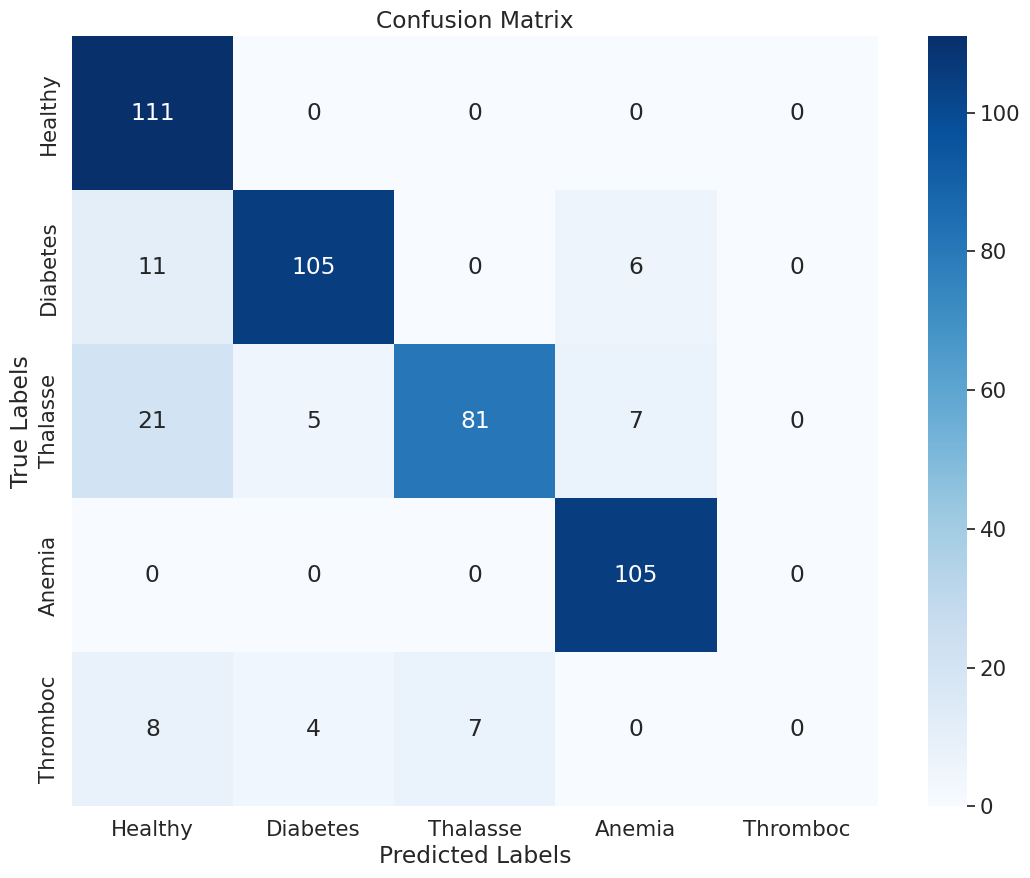

In [90]:
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

cm = confusion_matrix(y_test, y_pred)
class_labels = df['Disease'].unique()

plt.figure(figsize=(13, 10))
sb.set(font_scale=1.4)
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()